In [437]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rishikeshkonapure/zomato")

print("Path to dataset files:", path)

Path to dataset files: /Users/poojitha/.cache/kagglehub/datasets/rishikeshkonapure/zomato/versions/1


In [439]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [441]:
!pip install kagglehub


In [442]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rishikeshkonapure/zomato")

print("Path to dataset files:", path)

Path to dataset files: /Users/poojitha/.cache/kagglehub/datasets/rishikeshkonapure/zomato/versions/1


In [445]:
import os

print(path)  # Path returned by kagglehub
print(os.listdir(path))  # Lists files in the dataset folder


/Users/poojitha/.cache/kagglehub/datasets/rishikeshkonapure/zomato/versions/1
['zomato.csv']


In [447]:
file_path = os.path.join(path, "zomato.csv")  # Replace with actual filename
df = pd.read_csv(file_path)

pd.reset_option('display.max_colwidth')

In [448]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [451]:
# To check for NULL values in the dataset
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [453]:
# To display the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [455]:
# Drop columns that would not be necessary for our analysis
df.drop(['url','address','menu_item','phone'], axis=1, inplace=True)

In [457]:
# To get the list of columns in the dataset
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [459]:
#Check the number of rows and columns of dataset
df.shape

(51717, 13)

In [461]:
#Drop rows since <1% of data is missing from these columns

df = df.dropna(subset=['location', 'rest_type', 'cuisines', 'approx_cost(for two people)'])


In [463]:
# Check for NULL values again
df.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                            7615
votes                              0
location                           0
rest_type                          0
dish_liked                     27713
cuisines                           0
approx_cost(for two people)        0
reviews_list                       0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [465]:
# Remove the /5 in rate column

df['rate'] = df['rate'].str.replace('/5', '', regex=False).str.strip()

In [239]:
# df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

df['rate'].value_counts()

rate
3.9    3958
3.8    3819
3.7    3808
3.6    3287
4.0    3145
4.1    2928
3.5    2764
3.4    2447
3.3    2277
NEW    2205
4.2    2155
3.2    1845
4.3    1683
3.1    1550
4.4    1146
3.0     991
2.9     801
4.5     656
2.8     580
2.7     303
4.6     300
2.6     249
4.7     167
2.5     100
2.4      66
4.8      66
-        65
4.9      55
2.3      51
2.2      26
2.1      24
2.0      11
1.8       5
Name: count, dtype: int64

In [467]:
# Create flag before replacing NEW in rate column

df['is_new'] = df['rate'].str.upper().eq('NEW').astype(int)


In [469]:
# Convert to numeric, replace invalid values with Nan

df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

In [471]:
# Determine median values from the list of ratings which are not 0
median_rate = df.loc[df['is_new'] == 0, 'rate'].median()

#Assign median values to the rating column if the restaurants are not new and has missing values in rating column
df.loc[(df['is_new'] == 0) & (df['rate'].isna()), 'rate'] = median_rate

#Assign 0 to rating column of NEW restaurants
df.loc[df['is_new'] == 1, 'rate'] = 0

In [473]:
# Convert the rating to float
df['rate'] = df['rate'].astype(float)

In [475]:
df['rate'].describe()

count    51148.000000
mean         3.542115
std          0.849375
min          0.000000
25%          3.400000
50%          3.700000
75%          3.900000
max          4.900000
Name: rate, dtype: float64

In [477]:
df['dish_liked'].isna().sum()

27713

In [479]:
df['votes'] = df['votes'].astype(int)

In [481]:
df['votes'].describe()

count    51148.000000
mean       284.917885
std        806.495210
min          0.000000
25%          7.000000
50%         41.000000
75%        199.000000
max      16832.000000
Name: votes, dtype: float64

In [483]:
(df['location'] == df['listed_in(city)']).value_counts()


False    35291
True     15857
Name: count, dtype: int64

In [485]:
# Since there are 2 columns for location and city of the restaurant, Let's drop one of the column i.e listed_in(city)
df.drop(['listed_in(city)'], axis=1, inplace=True)

In [487]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype(int)

In [489]:
df['approx_cost(for two people)'] .describe()

count    51148.000000
mean       556.043736
std        439.555299
min         40.000000
25%        300.000000
50%        400.000000
75%        700.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64

In [491]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'listed_in(type)', 'is_new'],
      dtype='object')

In [493]:
cols = {
    "name": "restaurant_name",
    "online_order": "has_online_order",
    "book_table": "has_table_booking",
    "rate": "average_rating",
    "votes": "total_votes",
    "location": "location",
    "rest_type": "restaurant_type",
    "dish_liked": "popular_dishes",
    "cuisines": "cuisines_offered",
    "approx_cost(for two people)": "approx_cost_for_two",
    "reviews_list": "reviews",
    "menu_item": "menu_items",
    "listed_in(type)": "restaurant_type"
}

df = df.rename(columns=cols)

In [495]:
df.head()

,restaurant_name,has_online_order,has_table_booking,average_rating,total_votes,location,restaurant_type,popular_dishes,cuisines_offered,approx_cost_for_two,reviews,restaurant_type,is_new
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,0
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,0
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,0
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,0


In [497]:
# Mapping the columns to 1 and 0
df['has_online_order'] = df['has_online_order'].map({'Yes': 1, 'No': 0}).astype('Int8')


In [499]:
df['has_table_booking'] = df['has_table_booking'].map({'Yes': 1, 'No': 0}).astype('Int8')

In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51148 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   restaurant_name      51148 non-null  object 
 1   has_online_order     51148 non-null  Int8   
 2   has_table_booking    51148 non-null  Int8   
 3   average_rating       51148 non-null  float64
 4   total_votes          51148 non-null  int64  
 5   location             51148 non-null  object 
 6   restaurant_type      51148 non-null  object 
 7   popular_dishes       23435 non-null  object 
 8   cuisines_offered     51148 non-null  object 
 9   approx_cost_for_two  51148 non-null  int64  
 10  reviews              51148 non-null  object 
 11  restaurant_type      51148 non-null  object 
 12  is_new               51148 non-null  int64  
dtypes: Int8(2), float64(1), int64(3), object(7)
memory usage: 4.9+ MB


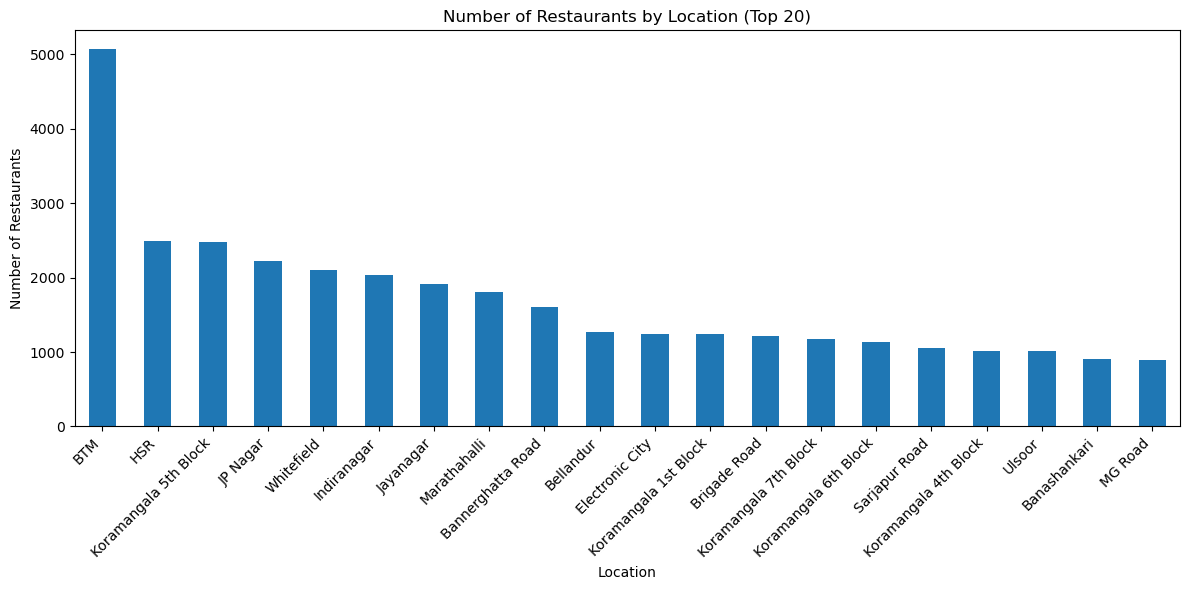

In [503]:
import matplotlib.pyplot as plt

# Count restaurants per location
location_counts = df['location'].value_counts()

# Plot top 20 locations (to keep the plot readable)
location_counts.head(20).plot(kind='bar', figsize=(12,6))

plt.title('Number of Restaurants by Location (Top 20)')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

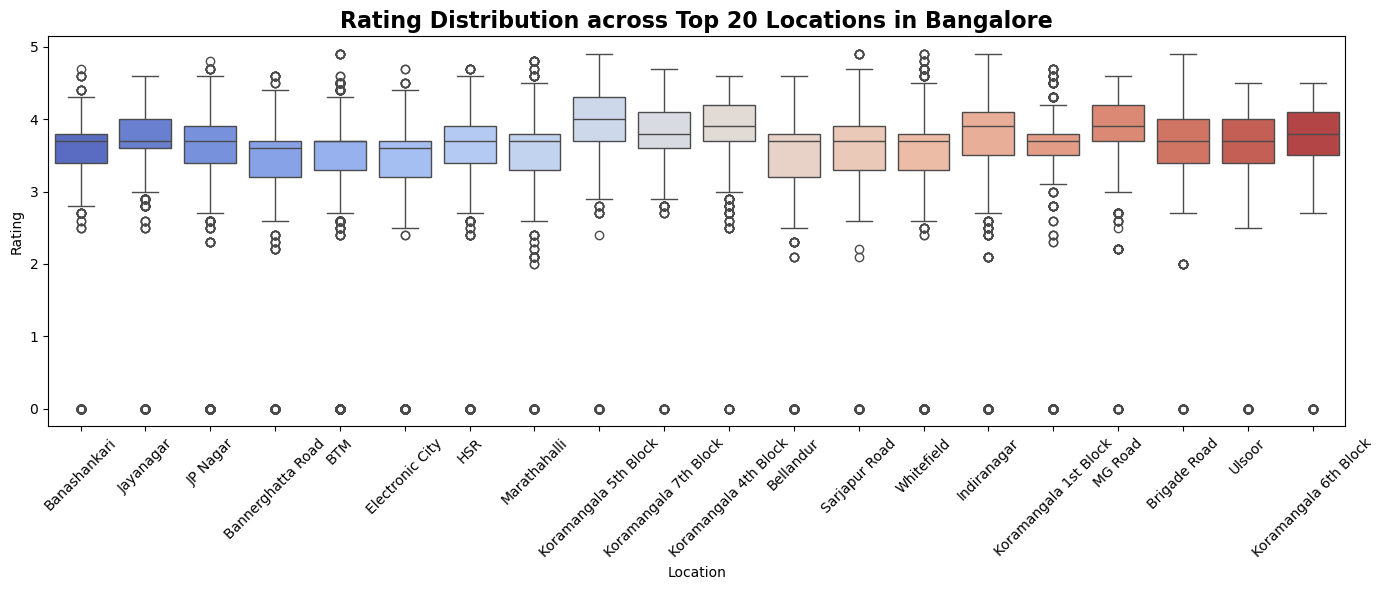

In [505]:
plt.figure(figsize=(14,6))
top_locations = df['location'].value_counts().head(20).index  # focus on top 20 locations
sns.boxplot(
    data=df[df['location'].isin(top_locations)],
    x='location',
    y='average_rating',
    hue='location',
    palette='coolwarm',
    legend=False
)
plt.xticks(rotation=45)
plt.title("Rating Distribution across Top 20 Locations in Bangalore", fontsize=16, fontweight='bold')
plt.ylabel("Rating")
plt.xlabel("Location")
plt.tight_layout()
plt.show()


<Axes: xlabel='average_rating', ylabel='Count'>

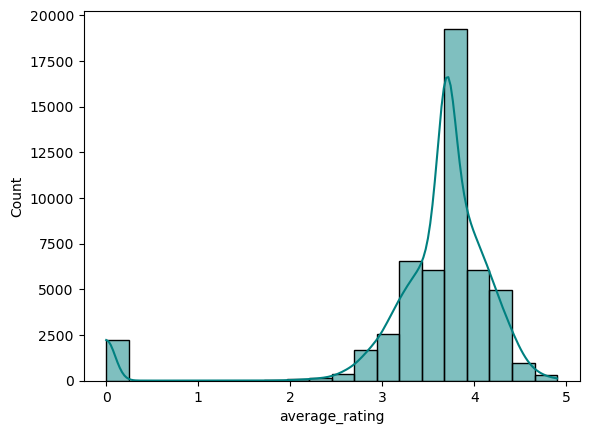

In [507]:
# Ratings distribution- how restaurants are rated
sns.histplot(df['average_rating'], bins=20, kde=True, color='teal')


Majority of restaurants are rated between 3.5 and 4.5, with a peak close to 3.8
Curve is slightly left-skewed and very few restaurants have rating below 2.5

<Axes: xlabel='approx_cost_for_two', ylabel='average_rating'>

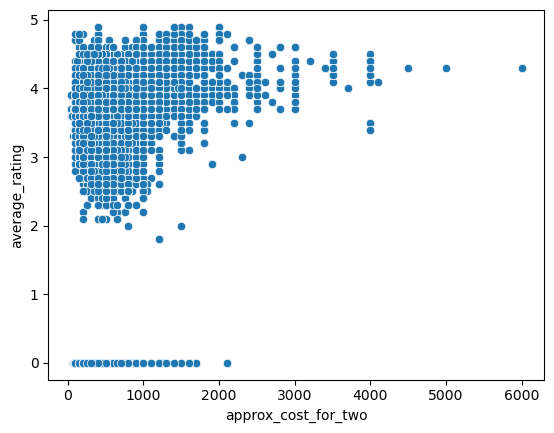

In [510]:
# cost vs rating relationship-  Identify if higher cost implies better ratings or not.
sns.scatterplot(x='approx_cost_for_two', y='average_rating', data=df)


From the scatterplot we can infer:
1. Most restaurants are rated between 3.5 and 4.5, regardless of price. This shows that ratings aren’t highly dependent on price – both affordable and expensive places can have high ratings.
2. Majority of the restaurants fall under ₹1000 for two.This means Zomato's dataset is dominated by mid-range to budget eateries.
3. The 0 ratings outliers can be considered as NEW/unreviewed restaurants
4. There is no obvious relationship between cost & rating

In [512]:
df[['approx_cost_for_two', 'average_rating']].corr()

,approx_cost_for_two,average_rating
approx_cost_for_two,1.000000,0.222678
average_rating,0.222678,1.000000


There is a very weak positive relationship of 0.22

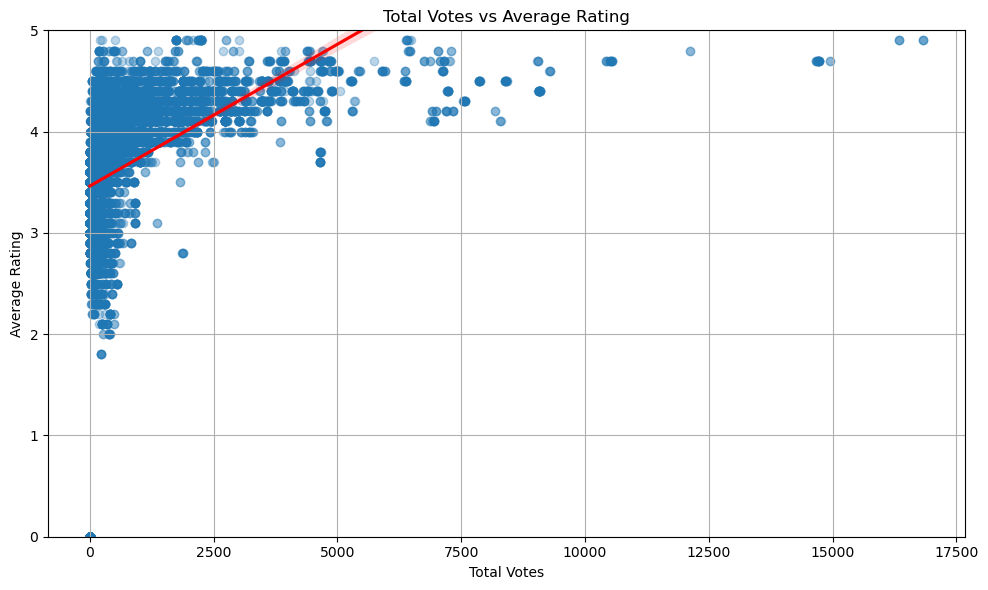

In [514]:
# To determine a restaurants total no of votes and average rating
plt.figure(figsize=(10, 6))
sns.regplot(x='total_votes', y='average_rating', data=df, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})

plt.title('Total Votes vs Average Rating')
plt.xlabel('Total Votes')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()

plt.ylim(0, 5)
plt.show()

We can see that high vote count doesn't guarantee high rating.Many restaurants with thousands of votes still have average ratings around 4.0.Some low-rated restaurants still have high vote counts. It is a weak positive realtionship.

In [518]:
df['has_online_order'].unique()


<IntegerArray>
[1, 0]
Length: 2, dtype: Int8

In [520]:
df.dtypes

restaurant_name         object
has_online_order          Int8
has_table_booking         Int8
average_rating         float64
total_votes              int64
location                object
restaurant_type         object
popular_dishes          object
cuisines_offered        object
approx_cost_for_two      int64
reviews                 object
restaurant_type         object
is_new                   int64
dtype: object

Text(0.5, 0, 'Approx. Cost for Two')

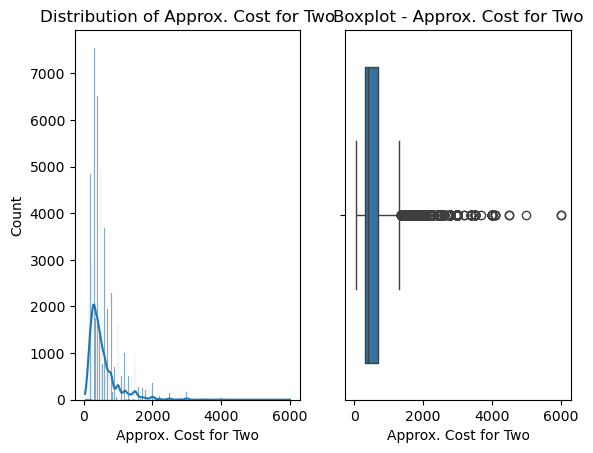

In [522]:
plt.subplot(1, 2, 1)
sns.histplot(df['approx_cost_for_two'], kde=True)
plt.title('Distribution of Approx. Cost for Two')
plt.xlabel('Approx. Cost for Two')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['approx_cost_for_two'])
plt.title('Boxplot - Approx. Cost for Two')
plt.xlabel('Approx. Cost for Two')

From the histplot- The distribution is highly right-skewed (most restaurants have a relatively low approx_cost_for_two, with a long tail towards high prices).A majority of values seem to be below ₹1000.There are only a few restaurants with costs going above ₹2000, but those are rare.

From the boxplot - The boxplot shows a very narrow IQR (middle 50% of the data is tightly clustered).There are a large number of outliers on the higher end (dots beyond the whiskers). Some extreme outliers go above ₹5000 — these might be luxury restaurants or possibly data entry errors.

In [534]:
df.columns = [f"{restaurant_type}_{i}" if df.columns.duplicated()[i] else restaurant_type 
              for i, restaurant_type in enumerate(df.columns)]


In [542]:
df.drop(columns=['restaurant_type_11'], inplace=True)

In [546]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51148 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   restaurant_name      51148 non-null  object 
 1   has_online_order     51148 non-null  Int8   
 2   has_table_booking    51148 non-null  Int8   
 3   average_rating       51148 non-null  float64
 4   total_votes          51148 non-null  int64  
 5   location             51148 non-null  object 
 6   restaurant_type      51148 non-null  object 
 7   popular_dishes       23435 non-null  object 
 8   cuisines_offered     51148 non-null  object 
 9   approx_cost_for_two  51148 non-null  int64  
 10  reviews              51148 non-null  object 
 11  is_new               51148 non-null  int64  
dtypes: Int8(2), float64(1), int64(3), object(6)
memory usage: 4.5+ MB


In [550]:
# To determine the restaurant count, average rating and average cost based on the type of restaurant
df['restaurant_type'] = df['restaurant_type'].astype(str).str.split(',')
df_exploded = df.explode('restaurant_type')
df_exploded['restaurant_type'] = df_exploded['restaurant_type'].str.strip()
type_stats = (
    df_exploded
    .groupby('restaurant_type')
    .agg(
        restaurant_count=('restaurant_type', 'count'),
        avg_rating=('average_rating', 'mean'),
        avg_cost=('approx_cost_for_two','mean')
    )
    .reset_index()
    .sort_values('restaurant_count', ascending=False)
)
type_stats

,restaurant_type,restaurant_count,avg_rating,avg_cost
22,Quick Bites,20545,3.390022,320.516427
5,Casual Dining,12952,3.714446,882.172637
4,Cafe,5021,3.769130,653.126867
8,Delivery,4592,3.378332,415.018510
9,Dessert Parlor,3193,3.718165,367.550893
1,Bar,2418,3.855004,1314.991729
24,Takeaway,2130,3.253146,386.552113
0,Bakery,1989,3.526797,397.501257
2,Beverage Shop,1464,3.526434,253.128415
21,Pub,950,3.959684,1320.157895
